# 가설검정 실습

## 패키지 import

In [1]:
# 패키지 import
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import math
from scipy import stats

# 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
if os.name == 'nt' : # Windows OS
    font_family = "Malgun Gothic"
else: # MAC OS
    font_family = "AppleGothic"
    
sns.set(font=font_family, rc ={"axes.unicode_minus" : False})

## 1. 모분산을 알고 있는 경우 모평균의 가설 검정 = Z검정(단일 표본)
- 사람의 평균 수명을 알아보기 위해 사망자 100명을 표본으로 추출하여 조사 -> 평균 71.798년으로 나타남
- 모표준편차를 8.9년으로 가정할 때, 현재의 평균 수명은 70년보다 길다고 할 수 있는가를 검정하라(유의수준 a=0.05)

### 1) 가설 설정
- 귀무가설: 평균=70년
- 대립가설: 평균 > 70년
- 유의수준: a=0.05

### 2) 기각값(임계값)

In [2]:
# 기각값
z_95 = stats.norm.ppf(0.95)
print(z_95)

1.6448536269514722


### 3) 검정통계량 (z통계량)

In [3]:
# 변이 분석
n = 100
m_u = 70
m_sigma = 8.9
hysis_u = 71.798

# 검정통계량 계산
z = (hysis_u - m_u) / (m_sigma / np.sqrt(n))
print(z)

2.0202247191011256


### 4) 분포도 작성 및 통계적 결론
- 임계값 1.64 < z통계량 2.02, z통계량은 기각역에 속함

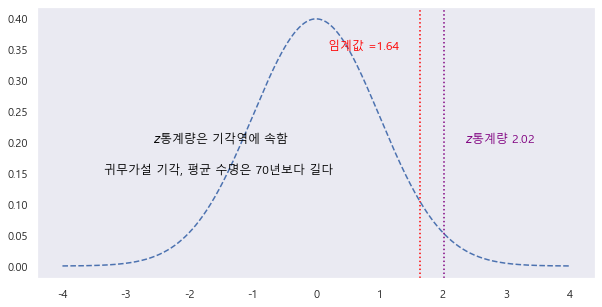

In [4]:
# 시각화
xx = np.linspace(-4, 4, 1000)
black = {'facecolor': 'black'}
plt.figure(figsize=(10, 5))

pdf_norm = stats.norm.pdf(xx)
plt.plot(xx, pdf_norm, 'b--')

# 95%의 임계값 표시
plt.axvline(x=z_95, color='red', linestyle=':')
plt.text(0.75, 0.35, '임계값 =' + str(round(z_95, 2)),
         horizontalalignment='center', color='red')

# 위에서 구한 카이분포 통계값 = z통계값
plt.axvline(x=z, color='purple', linestyle=':')
plt.text(2.9, 0.2, '$z$통계량 ' + str(round(z, 2)),
        horizontalalignment='center', color='purple')
plt.text(-1.5, 0.2, '$z$통계량은 기각역에 속함 ',
        horizontalalignment='center', color='black')
plt.text(-1.5, 0.15, '귀무가설 기각, 평균 수명은 70년보다 길다 ',
        horizontalalignment='center', color='black')

plt.grid()
plt.show()

## 2. 모분산을 모르고 n<30 경우 모평균의 가설 검정
- A편의점의 매운 라면의 연평균판매량은 46개
- 12곳의 매장을 표본추출하여 매운 라면의 판매량을 조사하엿더니 표본평균 42, 표본표준편차 11.9
- 라면 판매량의 모집단은 정규모집단으로 가정했을 때 연평균판매량이 46개보다 적은지 검정하라(유의수준 a=0.05)

### 1) 가설 설정
- 귀무가설: 평균=46
- 대립가설: 평균<46개
- 유의수준: a=0.05

### 2) 기각값

In [5]:
# 변이 분석
n = 12
s_mu = 42
s_sigma = 11.9
hysis_mu = 46

# 95% 좌측검정 기각값, df: 자유도
t_95 = -1 * stats.t.ppf(0.95, df = n-1)
print(t_95)

-1.7958848187036691


### 3) 검정통계량 (t통계량)

In [6]:
# 통계량 t값 계산
t_value = (s_mu - hysis_mu) / (s_sigma / np.sqrt(n))
print(t_value)

-1.1644039042479846


### 4) 분포도 작성 및 통계적 결론

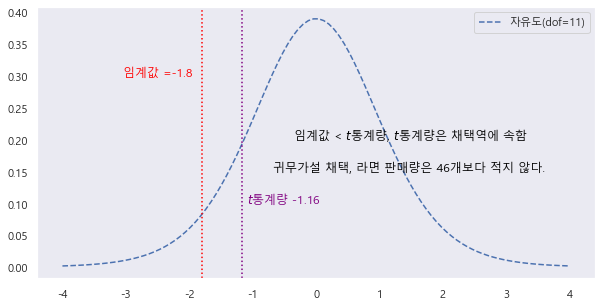

In [7]:
# 시각화
t_data = np.linspace(-4, 4, 100)
t_dist = stats.t(df = n-1)

black = {'facecolor': 'black'}
plt.figure(figsize=(10, 5))
plt.plot(t_data, t_dist.pdf(t_data), 'b--', label=('자유도(dof=%d)' %11))

# 95%의 임계값 표시
plt.axvline(x=t_95, color='red', linestyle=':')
plt.text(-2.5, 0.3, '임계값 =' + str(round(t_95, 2)),
        horizontalalignment='center', color='red')

# 위에서 구한 카이분포 통계값 = t통계량
plt.axvline(x=t_value, color='purple', linestyle=':')
plt.text(-0.5, 0.1, '$t$통계량 ' + str(round(t_value, 2)),
        horizontalalignment='center', color='purple')
plt.text(1.5, 0.2, '임계값 < $t$통계량, $t$통계량은 채택역에 속함 ',
        horizontalalignment='center', color='black')
plt.text(1.5, 0.15, '귀무가설 채택, 라면 판매량은 46개보다 적지 않다. ',
        horizontalalignment='center', color='black')
plt.grid()
plt.legend()
plt.show()

## 3. p-value(유의확률)

### 1) 모분산을 모르고 n<30 경우 모평균의 가설 검정의 사례 정리
- 통계량 t = -1.1644039042479846
- 95% 좌측검정 기각값: -1.7958848187036691
- 자유도 df: 12 - 1

In [8]:
# 변이 분석
n = 12
s_mu = 42
s_sigma = 11.9
hysis_mu = 46

# 95% 좌측검정 기각값, df: 자유도
t_95 = round(-1 * stats.t.ppf(0.95, df = n-1), 3)
print('기각값:', t_95)

# 통계량 t값 계산
t_value = (s_mu - hysis_mu) / (s_sigma / np.sqrt(n))
print('t통계량:', round(t_value, 3))

기각값: -1.796
t통계량: -1.164


In [9]:
# p_value(유의확률) 계산
round(stats.t(df=11).cdf(t_value), 3)

0.134

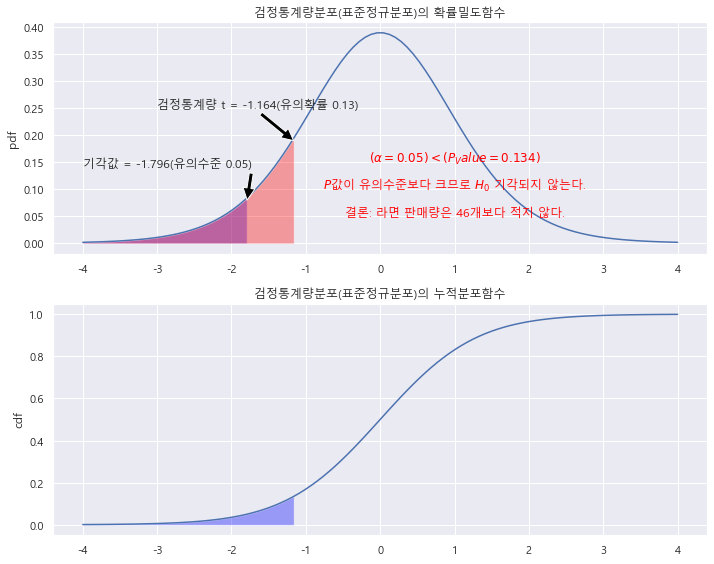

In [10]:
# 시각화
norm_rv = stats.t(df=11)

xx = np.linspace(-4, 4, 100)
plt.figure(figsize=(10, 8))
plt.subplot(211)
plt.plot(xx, norm_rv.pdf(xx))
plt.ylabel('pdf')
plt.title('검정통계량분포(표준정규분포)의 확률밀도함수')
black = {'facecolor': 'black'}

# 기각값 text
plt.annotate('기각값 = -1.796(유의수준 0.05)', xy = (-1.79, 0.08), xytext = (-4, 0.14),
            arrowprops=black)

# 기각값 면적
xx2 = np.linspace(-4, -1.796, 100)
plt.fill_between(xx2, norm_rv.pdf(xx2), facecolor='blue', alpha = 0.35)

# p_value(유의확률) test
plt.annotate('검정통계량 t = -1.164(유의확률 0.13)', xy = (-1.164, 0.19), xytext=(-3, 0.25),
            arrowprops = black)

# p_value(유의확률) 면적
xx3 = np.linspace(-4, -1.164, 100)
plt.fill_between(xx3, norm_rv.pdf(xx3), facecolor='red', alpha=0.35)

plt.text(1, 0.15, '$(α = 0.05) < (P_Value = 0.134)$',
        horizontalalignment='center', color='red')
plt.text(1, 0.1, '$P$값이 유의수준보다 크므로 $H_0$ 기각되지 않는다.',
        horizontalalignment='center', color='red')
plt.text(1, 0.05, '결론: 라면 판매량은 46개보다 적지 않다.',
        horizontalalignment='center', color='red')

# 누적분포도
plt.subplot(212)
plt.plot(xx, norm_rv.cdf(xx))

plt.fill_between(xx3, norm_rv.cdf(xx3), facecolor='blue', alpha=0.35)
plt.ylabel('cdf')
plt.title('검정통계량분포(표준정규분포)의 누적분포함수')

plt.tight_layout()
plt.show()